## ECOSTRESS Land Surface Temperature over Clear Lake Reservoir before and after the 2019 Tucker Fire

**Waterhackweek 2020: Fire and Water**



In [1]:
%matplotlib inline
from affine import Affine
import rioxarray
import xarray as xr
import numpy as np
import pandas as pd
from scipy import stats
import contextily as cx
import ulmo
from shapely.geometry import box
from matplotlib import pyplot
import folium
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import geopandas as gpd
import rasterio
import warnings
import matplotlib.pyplot as plt
import rasterio.mask
import fiona

In [2]:
# Read in Clear Lake Reservoir
Clear = gpd.read_file('zip://ECOSTRESS/Clear_Lake_Prj.zip/Clear_Lake_Prj.shp', crs='epsg:4326')

# Read in 2019 Tucker Fire
Fire = gpd.read_file('zip://ECOSTRESS/ca_tucker_20190804_0000_dd83.zip/ca_tucker_20190804_0000_dd83.shp', crs='epsg:4326')


In [3]:
# Display metadata collected from California Department of Fish and Wildlife
Clear

,DFGWATERID,TYPE,NAME,GNIS_NAME,GNIS_ID,COUNTY,QUAD_NAME,QUAD_CODE,LAT_NAD83,LON_NAD83,UTM_ZONE,UTM_N_N83,UTM_E_N83,MTR,elev_ft,sfc_acres,Shape_Leng,Shape_Area,geometry
0,8177,perennial,Clear Lake Reservoir,Clear Lake Reservoir,221199.0,Modoc,DOUBLE HEAD MTN.,41121G2,41.865752,-121.144879,10.0,4.636535e+06,653962.164441,M47N 07E,4484,25012.128035,110372.801128,1.012209e+08,"MULTIPOLYGON Z (((-121.07787 41.92649 0.00000,..."


In [4]:
# Display metadata collected for 2019 Tucker Fire
Fire

,IRWINID,mapmethod,unitIDProt,unitIDOwn,incidentID,fireName,perDatTime,comments,agency,active,...,inciwebId,firecode,mergeid,compfirecd,fireNum,ComplexNm,state,inComplex,gisAcres,geometry
0,{1DAFC388-98C2-401A-849E-C435E3260425},Mixed Methods,CAMDF,CAMDF,2019-CAMDF-000509,TUCKER,8/4/2019,Event Standard Perims,USFS,N,...,6470,MH73,None,None,000509,None,CA,N,14154.060004,"POLYGON ((-121.30266 41.76161, -121.30267 41.7..."


In [5]:
# Interactive map

# Note: There are other basemap tiles besides StamenTerrain
m = folium.Map(tiles='StamenTerrain', attr='ESRI')
# Bounding box

folium.GeoJson(
    Clear.geometry,
    style_function=lambda feature: {'color': 'blue', 'fillOpacity':0.1}
).add_to(m)

folium.GeoJson(
    Fire.geometry,
    style_function=lambda feature: {'color': 'red', 'fillOpacity':0.1}
).add_to(m)

# Set the map extent (bounds) to the extent of the bounding box
m.fit_bounds(m.get_bounds())

In [6]:
m

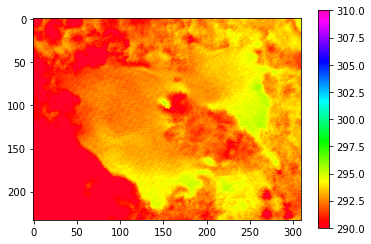

In [36]:
# Read in ECOSTRESS geotiff file from local source folder 
#  day 200, July 18, 2019 9:47:27 PM PDT
ECO_200 = rasterio.open('ECOSTRESS/doy2019200044727_aid0001.tif' )
temp_200 = ECO_200.read(1)
# Convert to floats
temp_200 = temp_200.astype('f4')
# Convert to Kelvin, scale factor = 0.02
ECO_200_k = temp_200 * 0.02
# Plot the LST
plt.imshow(ECO_200_k, cmap='gist_rainbow')
# Add colorbar to show the index
plt.colorbar()
plt.clim(290, 310)

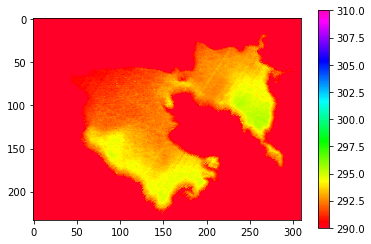

In [35]:
# Repeat for day 202, July 20, 2019 2:38:02 AM PDT
ECO_202 = rasterio.open('ECOSTRESS/doy2019202093802_aid0001.tif' )
temp_202 = ECO_202.read(1)
# Convert to floats
temp_202 = temp_202.astype('f4')
# Convert to Kelvin, scale factor = 0.02
ECO_202_k = temp_202 * 0.02
# Plot the LST
plt.imshow(ECO_202_k, cmap='gist_rainbow')
# Add colorbar to show the index
plt.colorbar()
plt.clim(290, 310)

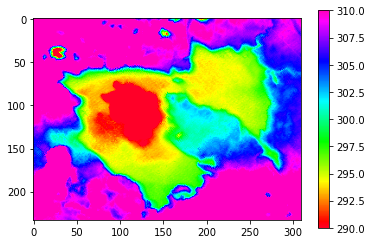

In [34]:
# day 211 , July 29, 2019 5:35:40 PM PDT
ECO_211 = rasterio.open('ECOSTRESS/doy2019211003540_aid0001.tif' )
temp_211 = ECO_211.read(1)
# Convert to floats
temp_211 = temp_211.astype('f4')
# Convert to Kelvin, scale factor = 0.02
ECO_211_k = temp_211 * 0.02
# Plot the LST
plt.imshow(ECO_211_k, cmap='gist_rainbow')
# Add colorbar to show the index
plt.colorbar()
plt.clim(290, 310)

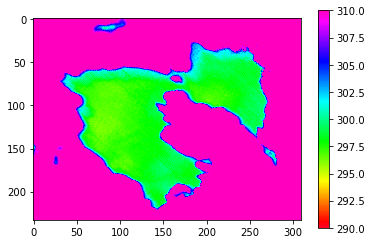

In [33]:
# day 218 , August 5, 2019 2:14:08 PM PDT
ECO_218 = rasterio.open('ECOSTRESS/doy2019218211408_aid0001.tif' )
temp_218 = ECO_218.read(1)
# Convert to floats
temp_218 = temp_218.astype('f4')
# Convert to Kelvin, scale factor = 0.02
ECO_218_k = temp_218 * 0.02
# Plot the LST
plt.imshow(ECO_218_k, cmap='gist_rainbow')
# Add colorbar to show the index
plt.colorbar()
plt.clim(290, 310)

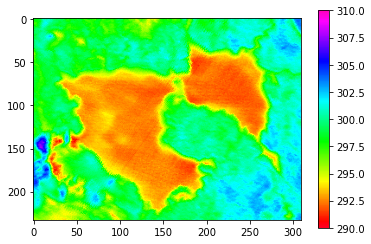

In [37]:
# day 224 , August 11, 2019 6:12:53 PM PDT
ECO_224 = rasterio.open('ECOSTRESS/doy2019224011253_aid0001.tif' )
temp_224 = ECO_224.read(1)
# Convert to floats
temp_224 = temp_224.astype('f4')
# Convert to Kelvin, scale factor = 0.02
ECO_224_k = temp_224 * 0.02
# Plot the LST
plt.imshow(ECO_224_k, cmap='gist_rainbow')
# Add colorbar to show the index
plt.colorbar()
plt.clim(290, 310)

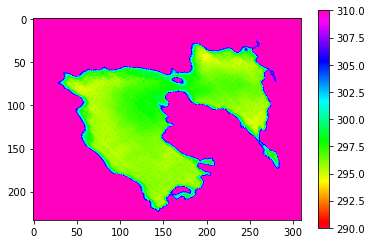

In [38]:
# day 225 , August 12, 2019 11:42:08 AM PDT
ECO_225 = rasterio.open('ECOSTRESS/doy2019225184208_aid0001.tif' )
temp_225 = ECO_225.read(1)
# Convert to floats
temp_225 = temp_225.astype('f4')
# Convert to Kelvin, scale factor = 0.02
ECO_225_k = temp_225 * 0.02
# Plot the LST
plt.imshow(ECO_225_k, cmap='gist_rainbow')
# Add colorbar to show the index
plt.colorbar()
plt.clim(290, 310)

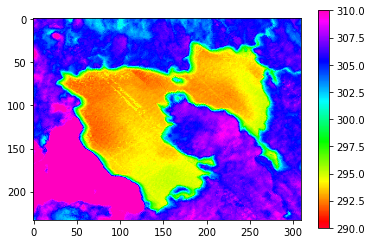

In [39]:
# day 229 , August 16, 2019 10:02:55 AM PDT
ECO_229 = rasterio.open('ECOSTRESS/doy2019229170255_aid0001.tif' )
temp_229 = ECO_229.read(1)
# Convert to floats
temp_229 = temp_229.astype('f4')
# Convert to Kelvin, scale factor = 0.02
ECO_229_k = temp_229 * 0.02
# Plot the LST
plt.imshow(ECO_229_k, cmap='gist_rainbow')
# Add colorbar to show the index
plt.colorbar()
plt.clim(290, 310)

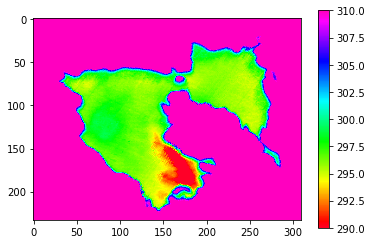

In [40]:
# day 234 , August 21, 2019 2:04:56 PM PDT
ECO_234 = rasterio.open('ECOSTRESS/doy2019234210456_aid0001.tif' )
temp_234 = ECO_234.read(1)
# Convert to floats
temp_234 = temp_234.astype('f4')
# Convert to Kelvin, scale factor = 0.02
ECO_234_k = temp_234 * 0.02
# Plot the LST
plt.imshow(ECO_234_k, cmap='gist_rainbow')
# Add colorbar to show the index
plt.colorbar()
plt.clim(290, 310)

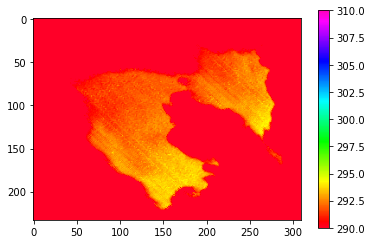

In [41]:
# day 241 , August 28, 2019 5:08:02 AM PDT
ECO_241 = rasterio.open('ECOSTRESS/doy2019241120802_aid0001.tif' )
temp_241 = ECO_241.read(1)
# Convert to floats
temp_241 = temp_241.astype('f4')
# Convert to Kelvin, scale factor = 0.02
ECO_241_k = temp_241 * 0.02
# Plot the LST
plt.imshow(ECO_241_k, cmap='gist_rainbow')
# Add colorbar to show the index
plt.colorbar()
plt.clim(290, 310)